In [141]:
import pandas as pd
import numpy as np
# To display all the columns
pd.options.display.max_columns = None
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

In [4]:
# Preprocessed data path
pp_path = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_avg_projection_splited'
os.listdir(pp_path)

['params.json', 'channels.csv', 'metadata.csv']

In [35]:
with open(os.path.join(pp_path, 'metadata.csv')) as file:
    metadata = pd.read_csv(file)
    
with open(os.path.join(pp_path, 'channels.csv')) as file:
    channels = pd.read_csv(file)

with open(os.path.join(pp_path, 'params.json')) as file:
    pp = json.load(file)
pp.keys()

dict_keys(['_comment', 'raw_data_dir', 'dir_type', 'perturbations_and_wells', 'external_libs_path', 'output_data_dir', 'seed', 'input_channels', 'output_channels', 'aggregate_output', 'train_frac', 'val_frac', 'img_size', 'subtract_background', 'background_value', 'normalise', 'percentile', 'add_cell_cycle_to_metadata', 'cell_cycle_file', 'add_well_info_to_metadata', 'well_info_file', 'filter_criteria', 'filter_values', 'convert_into_image', 'remove_original_data', 'project_into_scalar', 'method', 'log_file', 'log_level', 'data_dirs', 'normalise_rescale_values', 'normalise_rescale_values_scalars', 'output_files'])

In [36]:
# Add normalization values to channel df
channels['normalization_val'] = pp['normalise_rescale_values_scalars']
channels.drop(['Unnamed: 0'], axis=1, inplace=True)
channels

,channel_id,name,normalization_val
0,0,00_DAPI,56.132246
1,1,07_H2B,274.264162
2,2,01_CDK9_pT186,21.499582
3,3,03_CDK9,46.196136
4,4,05_GTF2B,126.727922
5,5,07_SETD1A,42.536269
6,6,08_H3K4me3,64.211107
7,7,09_SRRM2,73.813698
8,8,10_H3K27ac,292.815155
9,9,11_KPNA2_MAX,103.422563


In [40]:
metadata

,Unnamed: 0,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg,set
0,0,369581,plate01,I18,0,0,0,0,9,0,369487,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.797954,0.760859,0.742445,0.634022,0.663027,0.568395,0.730102,0.686346,0.366674,0.575989,0.684307,0.736716,0.732316,0.740041,0.635465,0.678882,0.653309,0.518513,0.664592,0.671655,0.709863,0.704627,0.689181,0.578649,0.640880,0.963868,0.537138,0.541909,0.705251,0.628631,0.742686,0.624242,0.675802,0.691226,0.893528,0.727097,0.778933,0.773748,train
1,1,369583,plate01,I18,0,0,0,0,11,0,369489,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.723802,0.817599,0.552732,0.545909,0.700967,0.695602,0.729558,0.731996,0.210496,0.457588,0.861228,0.846120,0.567214,0.767485,0.717981,0.654874,0.602190,0.712462,0.664804,0.565396,0.742811,0.644895,0.787064,0.674728,0.644300,0.930544,0.636029,0.651211,0.705137,0.637545,0.862667,0.726507,0.765920,0.681950,0.827772,0.413577,0.617883,0.758037,train
2,2,369584,plate01,I18,0,0,0,0,12,0,369490,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.840696,0.929793,0.407526,0.486692,0.682011,0.167238,0.440246,0.686533,0.185236,0.378296,0.631725,0.714524,0.305706,0.509345,0.709603,0.537640,0.524173,0.276606,0.669621,0.517582,0.622845,0.632177,0.707219,0.307346,0.463200,0.810092,0.509207,0.573902,0.785905,0.602015,0.843908,0.678252,0.630470,0.658251,0.830965,0.408940,0.674905,0.589623,train
3,3,369585,plate01,I18,0,0,0,0,13,0,369491,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.794479,0.567609,1.046119,0.739995,0.934936,1.018996,0.794462,0.794089,0.178088,0.757432,0.911557,0.777467,0.732617,0.794341,0.449047,0.704155,0.676932,0.505251,0.489204,0.809605,1.337379,0.755681,0.812838,0.839893,0.896986,0.850779,0.849887,0.896995,0.584139,0.764801,0.749374,0.491297,0.856009,0.824890,0.906335,0.571464,0.785784,0.732261,train
4,4,369586,plate01,I18,0,0,0,0,14,0,369492,plate01,I18,0,0,0,0,14,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.550997,0.608366,0.253561,0.166947,0.445885,0.278494,0.357785,0.432984,0.124483,0.247782,0.028756,0.478999,0.229982,0.437616,0.478644,0.404991,0.382058,0.324963,0.457266,0.362926,0.391432,0.386674,0.504923,0.254977,0.204945,0.621206,0.519153,0.368919,0.519851,0.419770,0.546952,0.507730,0.462206,0.525616,0.836503,0.344327,0.534069,0.564822,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13095,13095,196980,plate01,J12,5,3,0,0,16,0,196946,plate01,J12,5,3,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,normal,NaN,0.466116,0.427223,0.524259,0.559983,0.778531,0.549776,0.643514,0.551811,0.193130,0.478116,0.712937,0.743597,0.522384,0.581592,0.384521,0.480271,0.515179,0.437035,0.545412,0.428227,0.565138,0.481548,0.577957,0.520295,0.529232,0.743118,0.569474,0.409859,0.606166,0.481509,0.666436,0.509698,0.621739,0.579675,0.892434,0.762380,0.589774,0.685176,test
13096,13096,266544,plate01,J

In [155]:
x_columns = [c+'_'+pp['method'] for c in pp['input_channels']]
X_train = metadata[x_columns][metadata.set == 'train']
X_val = metadata[x_columns][metadata.set == 'val']
X_test = metadata[x_columns][metadata.set == 'test']

In [156]:
y_columns = pp['output_channels'][0]+'_'+pp['method']
y_norm_val = channels.set_index('name').loc[pp['output_channels']].normalization_val.values[0]
Y_train = metadata[y_columns][metadata.set == 'train'] * y_norm_val
Y_val = metadata[y_columns][metadata.set == 'val'] * y_norm_val
Y_test = metadata[y_columns][metadata.set == 'test'] * y_norm_val

## OLS

In [170]:
ols_model = lm.LinearRegression().fit(X_train.values, Y_train.values)

# Show R^2
R2_train = ols_model.score(X_train.values, Y_train.values)
R2_val = ols_model.score(X_val.values, Y_val.values)
print('Train R^2: {}'.format(R2_train))
print('Val R^2: {}'.format(R2_val))

Train R^2: 0.8230236347538463
Val R^2: 0.8159729404749432


In [200]:
columns = ['y', 'y_hat']
ols_df = pd.DataFrame(np.concatenate((Y_train.values.reshape(-1,1), ols_model.predict(X_train).reshape(-1,1)), axis=1), columns=columns)
ols_df['set'] = 'Train'

temp_df = pd.DataFrame(np.concatenate((Y_val.values.reshape(-1,1), ols_model.predict(X_val).reshape(-1,1)), axis=1), columns=columns)
temp_df['set'] = 'Val'

ols_df = pd.concat((ols_df, temp_df), axis=0).reset_index()
ols_df = ols_df.drop(['index'], axis=1)
ols_df

,y,y_hat,set
0,342.910464,363.185225,Train
1,195.049564,316.464570,Train
2,192.862674,287.601133,Train
3,269.511643,355.810475,Train
4,162.390196,254.781792,Train
...,...,...,...
11766,414.874669,355.939185,Val
11767,356.591472,365.771367,Val
11768,358.646839,337.813865,Val
11769,315.877939,347.467928,Val


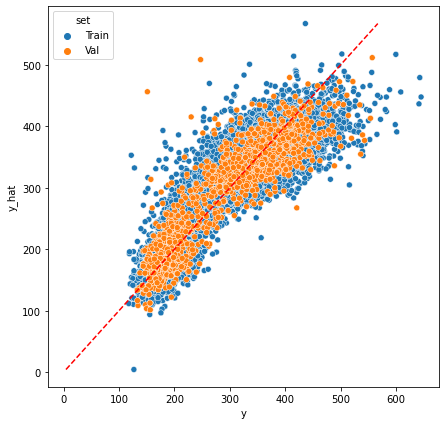

In [216]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=ols_df,
                x='y',
                y='y_hat',
                hue='set')

ols_min_val = ols_df[['y', 'y_hat']].min().values.min()
ols_max_val = ols_df[['y', 'y_hat']].max().values.min()

x_line = [ols_min_val, ols_max_val]
y_line = x_line
plt.plot(x_line, y_line, linestyle='dashed', color='red')

## Lasso Regression

In [217]:
Lasso_model = lm.Lasso(alpha=0.1).fit(X_train.values, Y_train.values)
print(Lasso_model.coef_)
print(Lasso_model.intercept_)

[-76.0204338  -40.64975541 104.44430673  98.56209157  90.05003235
  -1.70123544 -38.83067134 -20.62941151  34.70393719 -26.67694689
  26.07994259  -0.          12.34512414  -0.5072107   40.48166531
  -0.          -0.           8.39266609  28.49411091 -11.49874753
  -2.59713885   0.         -89.44685846  -0.         -34.63556004
 154.78398712   0.6864077  -18.33571902   8.30607918 -94.53925237
   3.47389904 -27.87421534   0.          43.72704213  30.39064363
  13.72263968  -0.        ]
185.5201340421947


In [219]:
# Show R^2
Lasso_R2_train = Lasso_model.score(X_train.values, Y_train.values)
Lasso_R2_val = Lasso_model.score(X_val.values, Y_val.values)
print('Train R^2: {}'.format(Lasso_R2_train))
print('Val R^2: {}'.format(Lasso_R2_val))

Train R^2: 0.8181245348321873
Val R^2: 0.8117045354176399


In [222]:
columns = ['y', 'y_hat']
Lasso_df = pd.DataFrame(np.concatenate((Y_train.values.reshape(-1,1), Lasso_model.predict(X_train).reshape(-1,1)), axis=1), columns=columns)
Lasso_df['set'] = 'Train'

temp_df = pd.DataFrame(np.concatenate((Y_val.values.reshape(-1,1), Lasso_model.predict(X_val).reshape(-1,1)), axis=1), columns=columns)
temp_df['set'] = 'Val'

Lasso_df = pd.concat((Lasso_df, temp_df), axis=0).reset_index()
Lasso_df = Lasso_df.drop(['index'], axis=1)
Lasso_df

,y,y_hat,set
0,342.910464,368.970471,Train
1,195.049564,328.632926,Train
2,192.862674,295.958516,Train
3,269.511643,369.341429,Train
4,162.390196,255.311779,Train
...,...,...,...
11766,414.874669,356.673837,Val
11767,356.591472,360.082478,Val
11768,358.646839,339.714611,Val
11769,315.877939,332.190257,Val


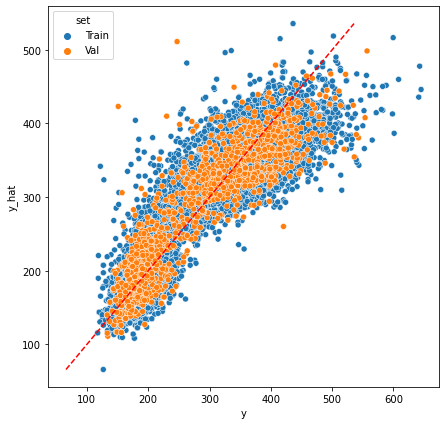

In [224]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=Lasso_df,
                x='y',
                y='y_hat',
                hue='set')

Lasso_min_val = Lasso_df[['y', 'y_hat']].min().values.min()
Lasso_max_val = Lasso_df[['y', 'y_hat']].max().values.min()

x_line = [Lasso_min_val, Lasso_max_val]
y_line = x_line
plt.plot(x_line, y_line, linestyle='dashed', color='red')

In [231]:
mask = (Lasso_df.set == 'Val')
mse_val = ((Lasso_df['y'][mask] - Lasso_df['y_hat'][mask])**2).mean()/Lasso_df[mask].shape[0]
mse_val

1.398401160399698

In [161]:
mse_test = ((Y_test - Y_test_hat)**2).mean()#/Y_test.shape[0]
mse_test

1671.759318654917

Text(0.5, 1.0, 'Errors BoxPlot')

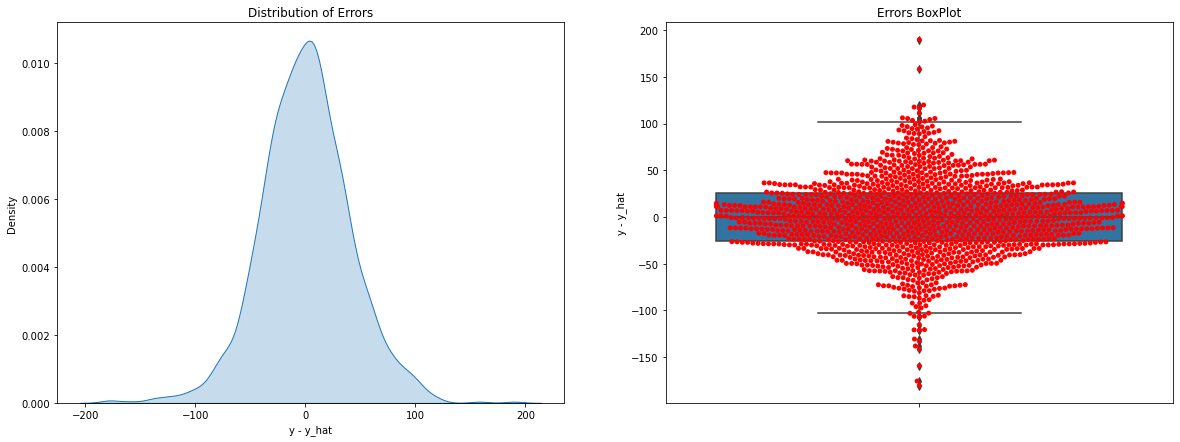

In [162]:
diff_df = (Y_test - Y_test_hat).reset_index().drop(['index'], axis=1)
diff_df.columns = ['diff']

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.kdeplot(x='diff',
            data=diff_df,
            shade=True, 
            bw_method=0.2)
plt.xlabel('y - y_hat')
plt.title('Distribution of Errors')

plt.subplot(1,2,2)
sns.boxplot(y='diff',
            data=diff_df)
sns.swarmplot(y='diff',
              color='red',
              data=diff_df)
plt.ylabel('y - y_hat')
plt.title('Errors BoxPlot')

In [142]:
pd.DataFrame(np.asarray(Y_test).reshape((-1,1)), columns=['values'])

,values
0,182.502609
1,235.619059
2,185.262979
3,192.769285
4,318.253620
...,...
1324,359.550328
1325,375.614026
1326,316.716326
1327,400.227596


/home/hhughes/anaconda3/envs/icb_mt/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Transcription Rate (TR) values distribution')

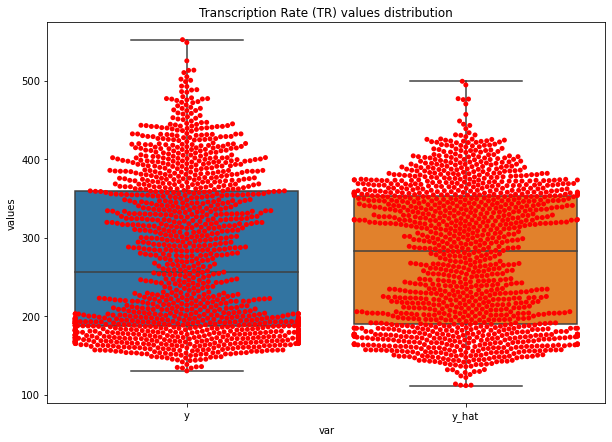

In [154]:
y_df = pd.DataFrame(np.asarray(Y_test.values).reshape((-1,1)), columns=['values'])
y_df['var'] = 'y'
y_hat_df = pd.DataFrame(Y_test_hat.reshape((-1,1)), columns=['values'])
y_hat_df['var'] = 'y_hat'
temp = pd.concat((y_df, y_hat_df), axis=0).reset_index()

plt.figure(figsize=(10,7))
sns.boxplot(y='values',
            x='var',
            data=temp)
sns.swarmplot(y='values',
              x='var',
              color='red',
              data=temp)
plt.title('Transcription Rate (TR) values distribution')

## Linear regression with Regularization

In [234]:
from sklearn.model_selection import GridSearchCV



# JUNTA VAL Y TRAIN PARA CV!!

In [261]:
enet = lm.ElasticNet()
ridge = lm.Ridge()
lasso = lm.Lasso()

params_enet = {'alpha':np.arange(0.1, 4, 0.01), 'l1_ratio':np.arange(0.1, 1.1, 0.1)}
params_lasso_rige = {'alpha':np.arange(0.01, 0.11, 0.01), 'normalize':[True, False]}

enet_grid = GridSearchCV(enet, params_enet)
ridge_grid = GridSearchCV(ridge, params_lasso_rige)
lasso_grid = GridSearchCV(lasso, params_lasso_rige)

In [262]:

#Data frame!


enet_grid.fit(X_train.values, Y_train.values)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.6...
       3.4 , 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61,
       3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.71, 3.72,
       3.73, 3.74, 3.75, 3.76, 3.77, 3.78, 3.79, 3.8 , 3.81, 3.82, 3.83,
       3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94,
       3.95, 3.96, 3.97, 3.98, 3.99]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [263]:
enet_grid.best_estimator_

ElasticNet(alpha=0.3599999999999999, l1_ratio=1.0)

In [264]:
ridge_grid.fit(X_train.values, Y_train.values)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'normalize': [True, False]})

In [265]:
ridge_grid.best_estimator_

Ridge(alpha=0.08, normalize=True)

In [266]:
lasso_grid.fit(X_train.values, Y_train.values)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'normalize': [True, False]})

In [267]:
lasso_grid.best_estimator_

Lasso(alpha=0.02, normalize=True)